# Text-Guided Editing of Images (Using CLIP and StyleGAN)

In [1]:
#@title Setup (may take a few minutes)
# !git clone https://github.com/orpatashnik/StyleCLIP.git

import os
os.chdir(f'/home/kevin/workspace/ocfm-image/styleclip/StyleCLIP')

# !pip install ftfy regex tqdm
# !pip install git+https://github.com/openai/CLIP.git
# !pip install pydrive

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # downloads StyleGAN's weights and facial recognition network weights
# ids = ['1EM87UquaoQmk17Q8d5kYIAHqu0dkYqdT', '1N0MZSqPRJpLfP4mFQCS14ikrVSe8vQlL']
# for file_id in ids:
#   downloaded = drive.CreateFile({'id':file_id})
#   downloaded.FetchMetadata(fetch_all=True)
#   downloaded.GetContentFile(downloaded.metadata['title'])

In [2]:
experiment_type = 'edit' #@param ['edit', 'free_generation']

description = 'A person with purple hair' #@param {type:"string"}

# latent_path = 'latents.pt' #@param {type:"string"}
latent_path = 'latent.pt'

optimization_steps = 40 #@param {type:"number"}

l2_lambda = 0.008 #@param {type:"number"}

id_lambda = 0.005 #@param {type:"number"}

stylespace = False #@param {type:"boolean"}

create_video = True #@param {type:"boolean"}

use_seed = True #@param {type:"boolean"}

seed = 1 #@param {type: "number"}

#@title Additional Arguments
args = {
    "description": description,
    "ckpt": "stylegan2-ffhq-config-f.pt",
    "stylegan_size": 1024,
    "lr_rampup": 0.05,
    "lr": 0.1,
    "step": optimization_steps,
    "mode": experiment_type,
    "l2_lambda": l2_lambda,
    "id_lambda": id_lambda,
    'work_in_stylespace': stylespace,
    "latent_path": latent_path,
    "truncation": 0.7,
    "save_intermediate_image_every": 1 if create_video else 20,
    "results_dir": "results",
    "ir_se50_weights": "model_ir_se50.pth"
}

In [3]:
import torch
torch.manual_seed(seed)

from optimization.run_optimization import main_batch
from argparse import Namespace
result = main_batch(Namespace(**args))

/home/kevin/miniforge3/envs/styleclip/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2000 2000


  0%|          | 0/2000 [00:09<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'original/00000.jpg'

In [3]:
if use_seed:
  import torch
  torch.manual_seed(seed)
from optimization.run_optimization import main
from argparse import Namespace
result = main(Namespace(**args))

/home/kevin/miniforge3/envs/styleclip/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: [Errno 2] No such file or directory: '../latent.pt'

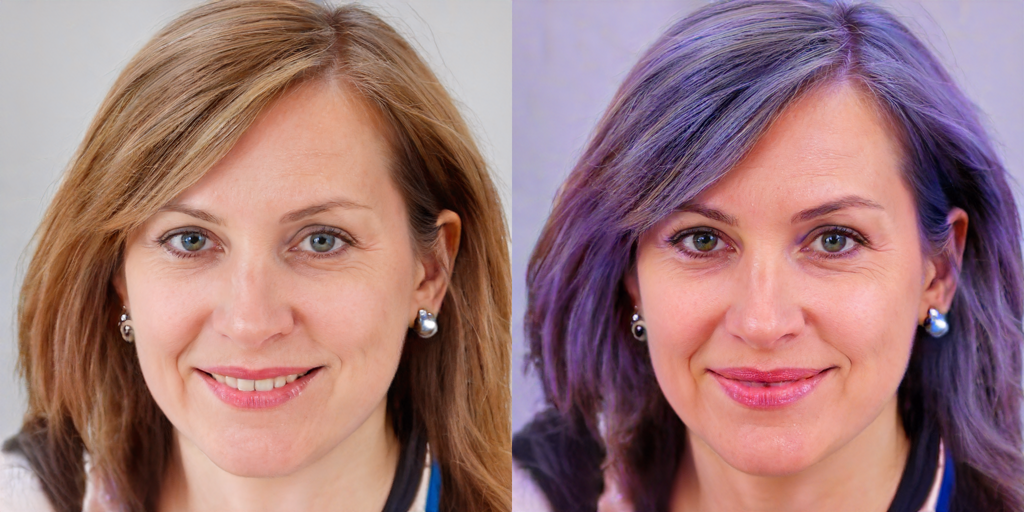

In [6]:
#@title Visualize Result
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size
result_image.resize((h // 2, w // 2))

In [ ]:
#@title Create and Download Video

!ffmpeg -r 15 -i results/%05d.jpg -c:v libx264 -vf fps=25 -pix_fmt yuv420p out.mp4
from google.colab import files
files.download('out.mp4')